<a href="https://colab.research.google.com/github/swati-singh23/Handwritten-Digit-Classification/blob/main/Digit_Classification_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow  # Importing TensorFlow library
from tensorflow import keras  # Importing Keras module from TensorFlow
from tensorflow.keras import Sequential  # Importing the Sequential model from Keras
from tensorflow.keras.layers import Dense, Flatten  # Importing Dense and Flatten layers from Keras


In [ ]:
# Loading the MNIST dataset, which consists of handwritten digits
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [ ]:
# Print the shape of the test data (X_test)
X_test.shape

(10000, 28, 28)

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

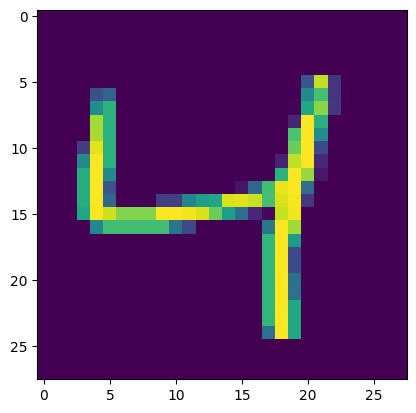

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X_train[2])

In [ ]:
# Normalize the pixel values in the training and test data by dividing by 255 (maximum pixel value)
X_train = X_train / 255
X_test = X_test / 255


In [ ]:
# Displaying the first sample in the training set (X_train[0])
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
# Initialize a Sequential model
model = Sequential()

# Flatten layer to convert 2D input data (28x28) into a 1D array (784)
model.add(Flatten(input_shape=(28,28)))

# Dense layer with 128 neurons and ReLU activation function
model.add(Dense(128, activation='relu'))

# Dense layer with 32 neurons and ReLU activation function
model.add(Dense(32, activation='relu'))

# Output layer with 10 neurons (for 10 classes) and softmax activation function
model.add(Dense(10, activation='softmax'))


In [ ]:
# Print a summary of the model architecture including layer names, output shape, and number of parameters
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 32)                4128      
                                                                 
 dense_8 (Dense)             (None, 10)                330       
                                                                 
Total params: 104938 (409.91 KB)
Trainable params: 104938 (409.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Compile the model with specified loss function, optimizer, and evaluation metrics
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])


In [ ]:
# Train the model on the training data (X_train, y_train) for a specified number of epochs with validation split
history = model.fit(X_train, y_train, epochs=25, validation_split=0.2)


Epoch 1/25
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2848 - accuracy: 0.9175 - val_loss: 0.1462 - val_accuracy: 0.9586
Epoch 2/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1214 - accuracy: 0.9642 - val_loss: 0.1246 - val_accuracy: 0.9635
Epoch 3/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0839 - accuracy: 0.9744 - val_loss: 0.1095 - val_accuracy: 0.9676
Epoch 4/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0629 - accuracy: 0.9798 - val_loss: 0.1023 - val_accuracy: 0.9695
Epoch 5/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0499 - accuracy: 0.9844 - val_loss: 0.1021 - val_accuracy: 0.9726
Epoch 6/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0385 - accuracy: 0.9874 - val_loss: 0.1103 - val_accuracy: 0.9699
Epoch 7/25
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0305 - accuracy: 0.9900 - val_loss: 0.1054 - val_accuracy:

In [ ]:
# Predict probabilities for the test data
y_prob = model.predict(X_test)


313/313 [==============================] - 2s 2ms/step


In [ ]:
# Find the index of the maximum probability for each sample in y_prob
y_pred = y_prob.argmax(axis=1)


In [ ]:
from sklearn.metrics import accuracy_score

# Calculate the accuracy score by comparing the true labels (y_test) with the predicted labels (y_pred)
accuracy = accuracy_score(y_test, y_pred)


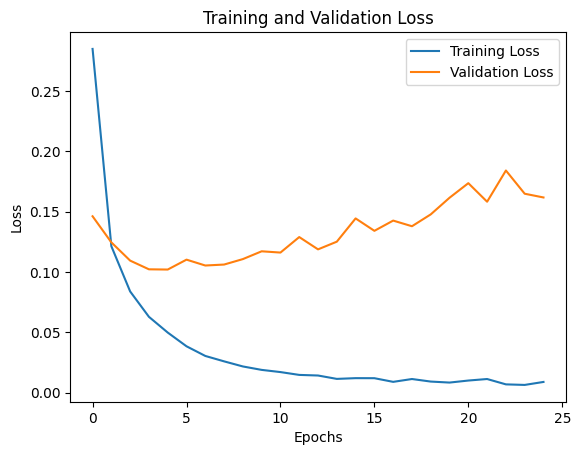

In [ ]:
import matplotlib.pyplot as plt

# Plotting the training and validation loss values over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


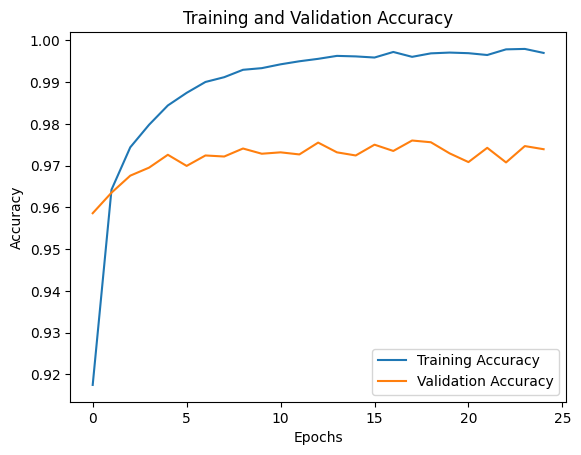

In [ ]:
import matplotlib.pyplot as plt

# Plotting the training and validation accuracy values over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


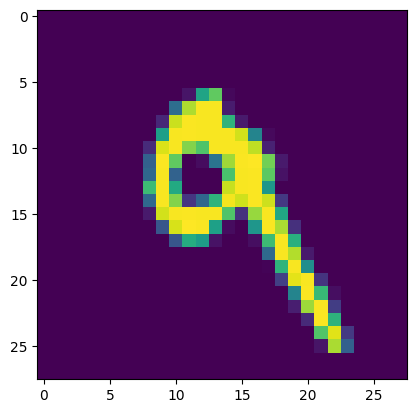

In [ ]:
plt.imshow(X_test[7])

In [ ]:
model.predict(X_test[7].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 25ms/step


array([9])